In [23]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import scipy
from scipy.signal import find_peaks
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from urllib.request import urlopen
import json


In [10]:
#File paths made to read external documents 
file_path1 = 'GHG.csv'
file_path2 = 'GDP.csv'


df_GHG = pd.read_csv(file_path1, sep = ';',encoding='ISO-8859-1')
df_GDP = pd.read_csv(file_path2, sep = ';',encoding='ISO-8859-1')

# The file had an incorrect delimiter which caused a ParserError,
# this is solved by adding sep=';' when reading the file. 
# This file also gave some UnicodeDecodeErorr, this is solved 
# by using encoding='ISO-8859-1'


In [18]:
#Filtering GHG data

df_GHG = df_GHG.rename(columns={'ï»¿TIME': 'Country'})            #Creating a more logical name for this column

for i in range(2012,2022):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GHG.drop(str(i), axis=1, inplace=True)                #Only focus on the data of pre-pandemic year 2019 and pandemic year 2020

for i in range(0, 2):
    df_GHG.drop(i, axis=0, inplace=True)

# Replace commas with periods, then replace periods with nothing
df_GHG['2019'] = df_GHG['2019'].str.replace('.', '').str.replace(',', '.').astype(float)
df_GHG['2020'] = df_GHG['2020'].str.replace('.', '').str.replace(',', '.').astype(float)


df_GHG.head()

,Country,2019,2020
2,Belgium,121677.88,110905.57
3,Bulgaria,54728.68,48459.83
4,Czechia,125394.77,114068.58
5,Denmark,48491.87,43838.10
6,Germany,824634.27,744730.64


In [11]:
df_GDP = df_GDP.rename(columns={'ï»¿TIME': 'Country'})    #Creating a more logical name for this column

for i in range(2000, 2023):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GDP.drop(str(i), axis=1, inplace=True)         #Only focus on the data of pre-pandemic year 2019 and pandemic year 2020

for i in range(0, 6):
    df_GDP.drop(i, axis=0, inplace=True)    

for i in range(43, 46):
    df_GDP.drop(i, axis=0, inplace=True)

#df_GDP['2019'] = df_GDP['2019'].str.replace(',', '').astype(float)
#df_GDP['2020'] = df_GDP['2020'].str.replace(',', '').astype(float)

df_GDP['Country'] = df_GDP['Country'].replace('TÃ¼rkiye', 'Turkiye')

df_GDP

,Country,2019,2020
6,Belgium,36.8,35.7
7,Bulgaria,16.6,16.6
8,Czechia,29.2,28.0
9,Denmark,39.5,39.9
10,Germany,37.9,37.0
11,Estonia,25.8,25.8
12,Ireland,59.3,61.6
13,Greece,20.6,18.6
14,Spain,28.5,24.9
15,France,33.1,31.4


In [12]:
df_GHG.head()

,ï»¿TIME,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),"4.097.021,33","4.011.238,28","3.872.409,58","3.920.945,85","3.929.767,53","3.960.228,70","3.881.129,12","3.724.270,32","3.359.710,70","3.541.454,64"
2,Belgium,"124.564,89","124.421,29","118.960,80","123.416,74","121.829,31","121.744,15","122.768,01","121.677,88","110.905,57","115.527,65"
3,Bulgaria,"60.240,72","55.007,92","58.112,93","61.026,60","58.488,40","60.506,94","56.202,40","54.728,68","48.459,83","54.479,62"
4,Czechia,"136.435,11","130.948,85","128.811,18","130.216,67","131.849,03","132.771,27","131.146,48","125.394,77","114.068,58","119.413,26"


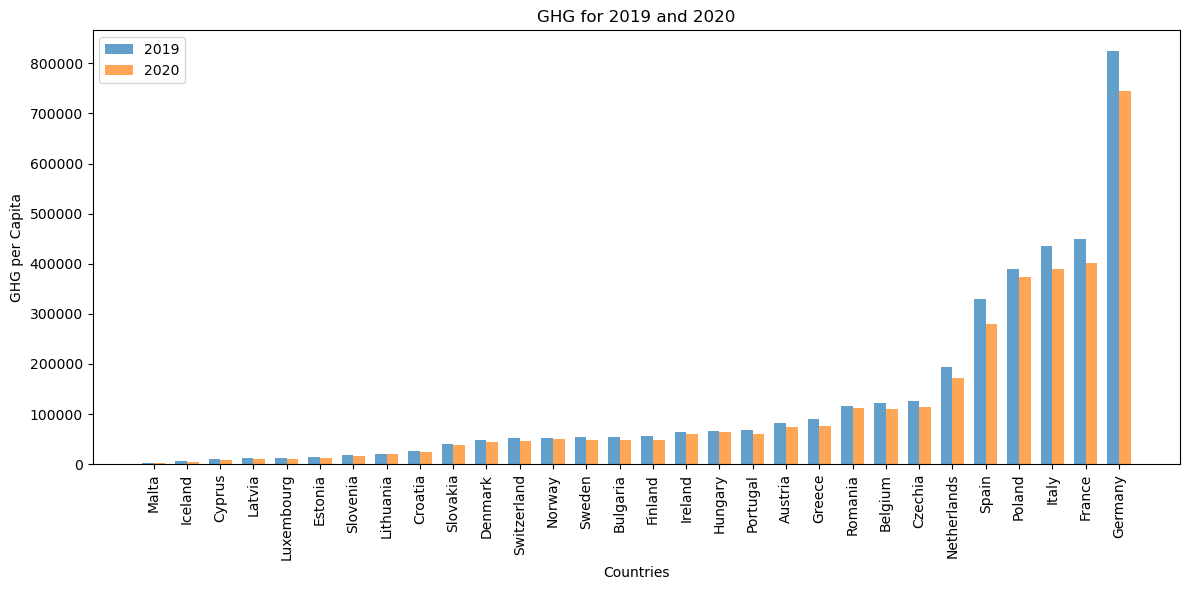

In [27]:
# Sample data
countries = df_GHG['Country']
ghg_2019 = df_GHG['2019']
ghg_2020 = df_GHG['2020']

# Sort data
sort_indices = np.argsort(ghg_2019)

countries_sorted = countries.iloc[sort_indices]
ghg_2019_sorted = ghg_2019.iloc[sort_indices]
ghg_2020_sorted = ghg_2020.iloc[sort_indices]

# Create an array of x values for the bar positions
x = np.arange(len(countries))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
fig= plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, ghg_2019_sorted, bar_width, label='2019', alpha=0.7)
plt.bar(x + bar_width/2, ghg_2020_sorted, bar_width, label='2020', alpha=0.7)

# Set the x-tick labels to be the country names
plt.xticks(x, countries_sorted, rotation=90)

# Set labels and title
plt.xlabel('Countries')
plt.ylabel('GHG per Capita')
plt.title('GHG for 2019 and 2020')
plt.legend()

plt.tight_layout()
plt.show()

fig.savefig('Emmissions19v20.png')


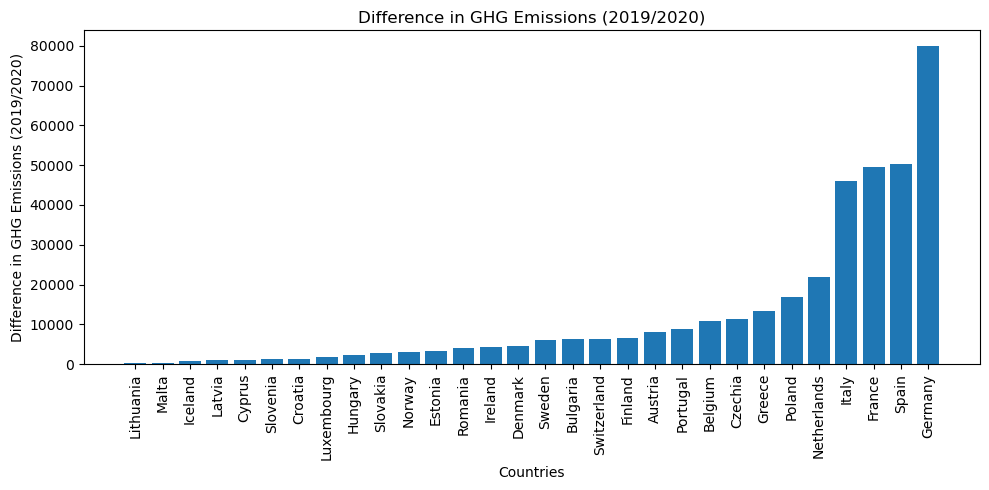

In [28]:
# Calculate the differences between 2019 and 2020
difference = df_GHG['2019'] - df_GHG['2020']

# Sort the data
sort_indices = np.argsort(difference)
countries_sorted = df_GHG['Country'].iloc[sort_indices]
difference_sorted = difference.iloc[sort_indices]

# Creating the bar plot
fig= plt.figure(figsize=(10, 5))
plt.bar(countries_sorted, difference_sorted)
plt.xlabel('Countries')
plt.ylabel('Difference in GHG Emissions (2019/2020)')
plt.title('Difference in GHG Emissions (2019/2020)')
plt.xticks(rotation=90)

# Displaying the plot
plt.tight_layout()
plt.show()
fig.savefig('GHGdifference.png')